# The Importance of Feature Scaling in KNN

In [6]:
import math
import os
import sys  # noqa

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.datasets import load_iris
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize
import sys
from pathlib import Path

## Deprecated (To review before deleting)

[Read this post](https://stats.stackexchange.com/questions/363889/which-type-of-data-normalizing-should-be-used-with-knn)

We need to normalize our data before performing KNN. The reasons are as follows, and for visualization see notebook's Normalization Section.

Suppose you had a dataset (m "examples" by n "features") and all but one feature dimension had values strictly between 0 and 1, while a single feature dimension had values that range from -1000000 to 1000000. When taking the euclidean distance between pairs of "examples", the values of the feature dimensions that range between 0 and 1 may become uninformative and the algorithm would essentially rely on the single dimension whose values are substantially larger. Just work out some example euclidean distance calculations and you can understand how the scale affects the nearest neighbor computation.

KNN is going to be effected the most. Since KNN just looks at the euclidean distance between data points scale matters hugely. Imagine you have one set of features A with values ranging between 0 and 105 and another B with values ranging from 0 to 1. A will dominate this model because even if you have values at the maximum possible difference possible between the B values it will only be equivalent to a minuscule difference in A.

From Introduction to Statistical Learning, it is also mentioned that:

> Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as KNN is concerned, a difference of 1,000 in salary is enormous compared to a difference of 50 years in age. Consequently, salary will drive the KNN classification results, and age will have almost no effect. This is contrary to our intuition that a salary difference of 1,000 is quite small compared to an age difference of 50 years. Furthermore, the importance of scale to the KNN classifier leads to another issue: if we measured salary in Japanese yen, or if we measured age in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years.



## Normalization

Normalization is a critical preprocessing step when using the K-NN algorithm.
The reasons for this requirement are elaborated below, and further visualization
can be found in the notebook's Normalization Section.

### Impact of Scale

Suppose a dataset consists of $m$ examples and $n$ features, where all but one
feature dimension have values strictly between 0 and 1, while a single feature
dimension has values ranging from -1000000 to 1000000. In such a scenario, the
Euclidean distance between pairs of examples will be dominated by the feature
with the large scale.

### Scale Sensitivity of K-NN

The K-NN algorithm relies on the Euclidean distance between data points, making
it highly sensitive to the scale of the features. If there's a discrepancy in
the scale across different features, the feature with the larger scale will
overshadow the others, leading to biased predictions.

For instance, consider two features $A$ with values ranging between 0 and 105,
and $B$ with values ranging from 0 to 1. The distance measure will be
disproportionately affected by feature $A$, making feature $B$ nearly irrelevant
in the classification process.

### Practical Example: Salary and Age

To further illustrate the impact of scale on the K-NN algorithm, consider a
dataset containing two variables: salary (measured in dollars) and age (measured
in years). A difference of 1,000 in salary might appear substantial compared to
a difference of 50 years in age when using the Euclidean distance. This would
lead salary to dominate the K-NN classification results, rendering age almost
ineffective.

However, intuitively, a salary difference of 1,000 might be considered small
compared to an age difference of 50 years. Furthermore, if salary were measured
in a different currency (e.g., Japanese yen) or age were measured in a different
unit (e.g., minutes), the classification results would differ significantly.

### Conclusion

The importance of normalization in the K-NN algorithm stems from its reliance on
the Euclidean distance metric, which is highly sensitive to the scale of the
features. Without normalization, features with larger scales can unduly
influence the algorithm's predictions, leading to biased and potentially
inaccurate results. Therefore, normalization ensures that all features
contribute equally to the distance computation, aligning the algorithm with the
underlying patterns in the data.

In [7]:
# load wine dataset
wine = datasets.load_wine()

# purposely load it in dataframe for a better idea of our data
wine = pd.DataFrame(
    data=np.c_[wine["data"], wine["target"]], columns=wine["feature_names"] + ["target"]
)


# set X to be the df without our target y | note the same can be achieved by calling wine.data
X = wine.drop("target", axis=1)

# Take only 2 features for simplicity
X = X[["alcalinity_of_ash", "hue"]].values

# set y to be our ground truth targets
y = wine["target"].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# call the unscaled model and fit on train
knn_unnormalized = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

# predict on X_test
y_test_unnormalized_preds = knn_unnormalized.predict(X_test)

# find accuracy score for unscaled model
print("KNN unscaled accuracy:", knn_unnormalized.score(X_test, y_test))

# call standard scaler which is just scaling function
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
# Technically we should not scale train and test together. But for simplicity we do this and split again.
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y)

# call the scaled model and fit on train
knn_normalized = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)
y_test_normalized_preds = knn_normalized.predict(X_test_scaled)

print("KNN scaled accuracy:", knn_normalized.score(X_test_scaled, y_test))
# Find the point in which the predictions disagree for the scaled and unscaled model
# Note that we just take one diagreement to make a point in the plots later

unscaled_input, scaled_input = [], []

# find difference in between scaled vs unscaled, and also want scaled pred to be equal to ground truth for the sake of argument here
for index, (unscaled_pred, scaled_pred) in enumerate(
    zip(y_test_unnormalized_preds, y_test_normalized_preds)
):

    if unscaled_pred != scaled_pred and scaled_pred == y_test[index]:
        unscaled_input.append(X_test[index])
        scaled_input.append(X_test_scaled[index])
        print(f"index of diagreement: {index}")
        print(
            f"Unscaled inputs : {X_test[index]}\nScaled inputs : {X_test_scaled[index]}"
        )
        print(
            f"\nGround Truth : {y_test[index]}\nUnscaled prediction : {y_test_unnormalized_preds[index]}\nScaled prediction : {y_test_normalized_preds[index]}\n"
        )

        print(
            f"Nearest Neighbour of xq for unscaled : {X_train[knn_unnormalized.kneighbors([X_test[index]], return_distance=True)[1][0][0]]}"
        )
        print(
            f"Nearest Neighbour of xq for scaled : {X_train_scaled[knn_normalized.kneighbors([X_test_scaled[index]], return_distance=True)[1][0][0]]}"
        )
        print()

        print(
            f"Euclidean Distance of Nearest Neighbour of xq for unscaled : {knn_unnormalized.kneighbors([X_test[index]], return_distance=True)[0][0][0]}"
        )
        print(
            f"Euclidean Distance of Nearest Neighbour of xq for scaled : {knn_normalized.kneighbors([X_test_scaled[index]], return_distance=True)[0][0][0]}"
        )
        print()

# 2 features, call x1 alcalinity, x2 hue
alcalinity_of_ash, hue = X_train[:, 0], X_train[:, 1]
# get min and max of both features for our plot later
min_alcalinity_of_ash, max_alcalinity_of_ash = alcalinity_of_ash.min(), alcalinity_of_ash.max()
min_hue, max_hue = hue.min(), hue.max()

# Note that normalization is even more needed when the range is far apart, not so much of "the scale only"
# for eg, is range of both feature is the same, it might be "ok" to not normalize

print(f"pre-scale: range of alcalinity is {max_alcalinity_of_ash - min_alcalinity_of_ash} and for hue is {max_hue-min_hue}")


# 2 features, call x1 alcalinity, x2 hue
alcalinity_of_ash, hue = X_train_scaled[:, 0], X_train_scaled[:, 1]
# get min and max of both features for our plot later
min_alcalinity_of_ash_scaled, max_alcalinity_of_ash_scaled = alcalinity_of_ash.min(), alcalinity_of_ash.max()
min_hue_scaled, max_hue_scaled = hue.min(), hue.max()

# Note that normalization is even more needed when the range is far apart, not so much of "the scale only"
# for eg, is range of both feature is the same, it might be "ok" to not normalize

print(f"after-scale: range of alcalinity is {max_alcalinity_of_ash_scaled - min_alcalinity_of_ash_scaled} and for hue is {max_hue_scaled-min_hue_scaled}")

KNN unscaled accuracy: 0.7111111111111111
KNN scaled accuracy: 0.6666666666666666
index of diagreement: 0
Unscaled inputs : [17.4   1.12]
Scaled inputs : [-2.49084714  0.40605066]

Ground Truth : 0.0
Unscaled prediction : 1.0
Scaled prediction : 0.0

Nearest Neighbour of xq for unscaled : [17.5   1.27]
Nearest Neighbour of xq for scaled : [-2.13050515  0.71316437]

Euclidean Distance of Nearest Neighbour of xq for unscaled : 0.18027756377320017
Euclidean Distance of Nearest Neighbour of xq for scaled : 0.47346085500975127

index of diagreement: 2
Unscaled inputs : [18.    1.12]
Scaled inputs : [-0.1185957   0.58154421]

Ground Truth : 0.0
Unscaled prediction : 1.0
Scaled prediction : 0.0

Nearest Neighbour of xq for unscaled : [18.    1.15]
Nearest Neighbour of xq for scaled : [-0.1486242  0.6254176]

Euclidean Distance of Nearest Neighbour of xq for unscaled : 0.029999999999999805
Euclidean Distance of Nearest Neighbour of xq for scaled : 0.05316563614379928

index of diagreement: 6
U

We take a point 26 in the prediction set as our query point `x_q` where the
unscaled value is `[10.6, 1.05]` while after scaling it is
`[0.63211678 0.18668373]`. Notice that the ground truth of this point 26 is
class 1, but unscaled predicted it as class 0 but scaled predicted it correctly.

To dig further, and for simplicity sake, we are only considering one neighbour
here, we return the closest point for both predictions and see that the closest
point in train set to our query is as such:

```python
range of alcalinity before scale = 18.8
range of hue before scale= 1.15

range of alcalinity after scale = 5.8
range of hue after scale= 4.25

x_q = [15.6, 1.04]

index of diagreement in test set: 6
Unscaled inputs : [15.6   1.04]
Scaled inputs : [0.75223078 0.40605066]

Ground Truth of x_q: 1.0
Unscaled prediction of x_q : 0.0
Scaled prediction of x_q: 1.0

Nearest Neighbour of xq for unscaled : [15.5   1.09]
Nearest Neighbour of xq for scaled : [0.90237327 0.44992405]

Euclidean Distance of Nearest Neighbour of xq for unscaled : 0.11180339887498919
Euclidean Distance of Nearest Neighbour of xq for scaled : 0.1564213644268565
```

More importantly, if you think of it, hue's 1.04 and 1.09 has a pertubation of
around 0.05/1.15 = 4.3%, while alcalinity 15.6 and 15.5 has a deviation of
around 0.1/18.8 = 0.53%. Intuitively, since feature hue has a higher deviation,
we would expect it to have a higher impact on deciding the final class, but if
you work out the math, 0.05 squared and 0.1 squared we take higher weightage on
the change in the alcalinity instead.

In the diagram below, (zoom out the matplotlib image), we can see geometrically
how the query point is and note that it is obvious that the scaled KNN predicted
it correctly.

After scaling, the range is more comparable and you can recalculate what I did
in the same way as above.

Note for our drawing to be to "scale", I purposely set the x and y axis range to
be the max of the "dominating" feature, in which case its alcalinity_of_ash. So
visually, we can clearly see that the range is dominated by this feature.

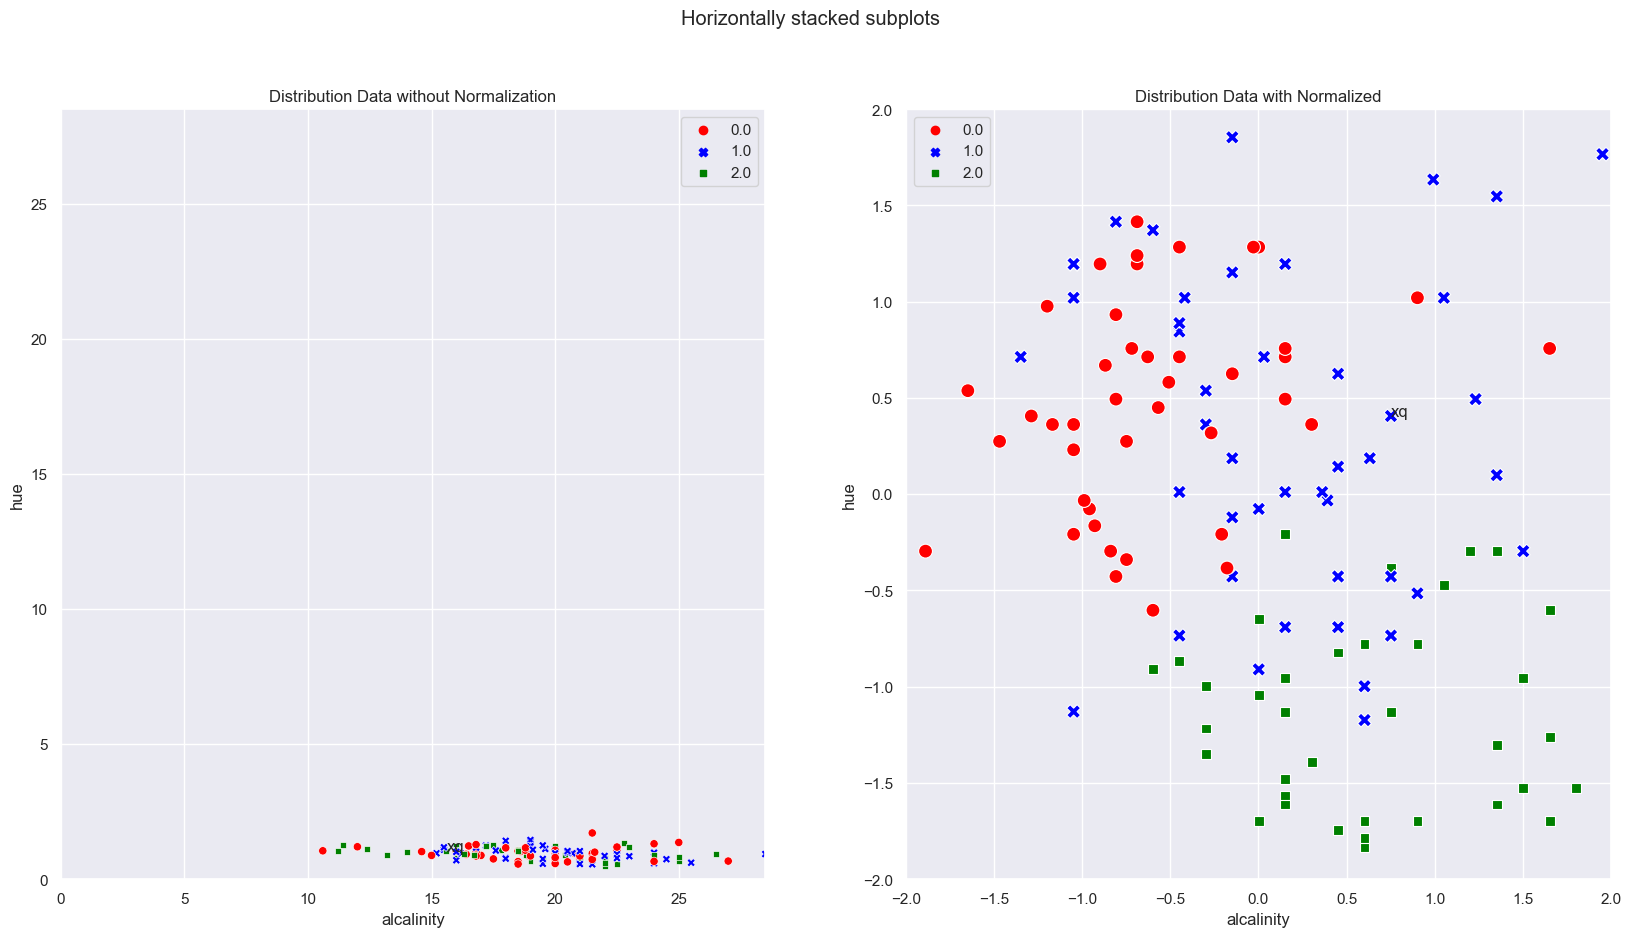

In [8]:
sns.set(rc={"figure.figsize": (20, 10)})
sns.color_palette("tab10")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Horizontally stacked subplots")

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, ax=ax1, palette=['red', 'blue', 'green'], style=y_train)
ax1.annotate("xq", [15.6  , 1.04])

ax1.set_xlim(0, max_alcalinity_of_ash)
ax1.set_ylim(0, max_alcalinity_of_ash)
ax1.set_title("Distribution Data without Normalization")
ax1.set(xlabel="alcalinity", ylabel="hue")




sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, s=100, ax=ax2, palette=['red', 'blue', 'green'], style=y_train)
ax2.annotate("xq",  [0.75223078 ,0.40605066])
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_title("Distribution Data with Normalized")
ax2.set(xlabel="alcalinity", ylabel="hue")

plt.show()